<a href="https://colab.research.google.com/github/jmarcoscosta/MachineLearning-IMD/blob/master/Poverty_and_hunger_in_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding poverty and hunger in India

- Identifying common causes to both problems
- Ranking those causes by studying their respective impacts
- Proposing pertinent solutions 

This work aims to gather information on the evolution of hunger and poverty in India during the last twenty years, and then propose measures to meet the challenges proposed by the UN.

## Goals: 
1. No poverty
2. Zero hunger

## Solution domains:
- Agroindustry
- Climate and environment
- Energy
- Food and poverty

In [1]:
from google.colab import drive
drive.mount('ML-IMD/')

Mounted at ML-IMD/


In [26]:
# Reading csv files

from pandas import read_csv

data = read_csv('/content/ML-IMD/My Drive/ML-IMD/FAOSTAT_data_9-21-2020.csv')

## Target 2.1

According to UN's website:
*By 2030, end hunger and ensure access by all people, in particular the poor and people in vulnerable situations, including infants, to safe, nutritious and sufficient food all year round*

The indicator used is the undernourishment, which means having insufficient food or other substances for good health and condition.




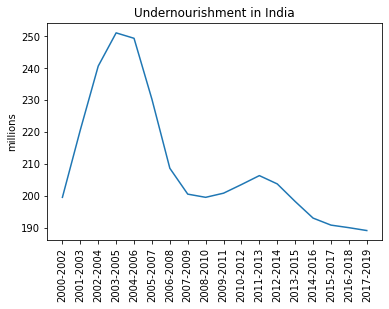

In [27]:
import matplotlib.pyplot as plt
years = data["Year"]
plt.plot(range(years.size), data["Value"])
plt.title("Undernourishment in India")
plt.xticks(range(years.size), years, rotation = 90)
plt.ylabel("millions")
plt.show()


Let's try to obtain a model for the undernourishment evolution through a linear regression. This model will use data starting at 2013, when the last undernourishment peak is already over.

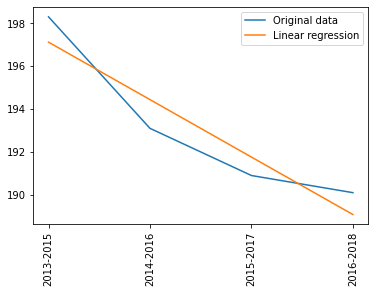

Linear regression model:
 
-2.68 x + 197.1


In [79]:
from numpy import polyfit, poly1d

year_range = years[13:17]
data_range = data["Value"][13:17]
x = range(year_range.size)
y = data_range
deg = 1

p = poly1d(polyfit(x, y, deg))
plt.plot(x, y, label = 'Original data')
plt.plot(x, p(x), label = 'Linear regression')
plt.xticks(x, year_range, rotation = 90)
plt.legend()
plt.show()
print("Linear regression model:")
print(p)

Now, with our linear model, let's see a new graph with the undernourishment values until 2030:

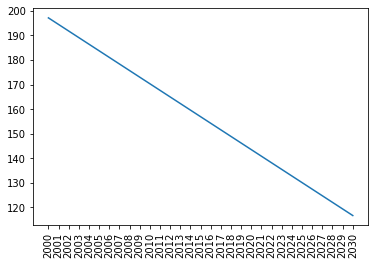

Undernourishment by 2030: 116.72000000000001 millions


In [88]:
x = range(0, 31)
ticks = [str(2000 + i) for i in x]
plt.plot(x, p(x))
plt.xticks(x, ticks, rotation = 90)
plt.show()

print("Undernourishment by 2030: " + str(p(30)) + " millions")

Following the model, we can estimate that there will be still about 120 million undernourished people by 2030, and the Target 2.1 won't be achieved.


# Target 1.2

According to UN's website: *By 2030, reduce at least by half the proportion of men, women and children of all ages living in poverty in all its dimensions according to national definitions*



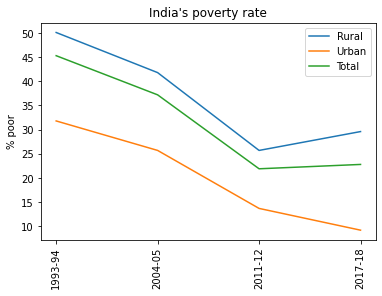

In [24]:
data = read_csv('/content/ML-IMD/My Drive/ML-IMD/data-7mtoz.csv')
years = data["Year"]
plt.plot(range(years.size), data['Rural'], label='Rural')
plt.plot(range(years.size), data['Urban'], label='Urban')
plt.plot(range(years.size), data['Total'], label='Total')
plt.legend()
plt.title("India's poverty rate")
plt.xticks(range(years.size), years, rotation = 90)
plt.ylabel("% poor")
plt.show()